In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
import glob
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
path=r'revamped_election_maps/'
all_files = glob.glob(path+"*_revamped.csv")

full_revamped=[]
for file in all_files:
    usecols=['id_number','dob','registration_date','voter_status','party_code',
             'county_1','gen_prim_2020_vote_method',"gen_prim_2020_party", "gen_elect_2020_party","gen_elect_2020_vote_method",
             'muni_prim_2021_vote_method','muni_prim_2021_party','muni_elect_2021_vote_method','muni_elect_2021_party',
             "gen_prim_2022_party","gen_prim_2022_vote_method","gen_elect_2022_party","gen_elect_2022_vote_method"]
    df = pd.read_csv(file,usecols=usecols)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    full_revamped.append(df)
df2=pd.concat(full_revamped,sort=False)

C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (85,86,87,88,109,110,111,112,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251

C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (70,71,76,77,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (74,75,76,77,78,79,80,81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\Local\Temp\ipykernel_9000\1171251966.py:10: DtypeWarning: Columns (86,87,90,91,126,127,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file,usecols=usecols)
C:\Users\c_ull\AppData\L

In [11]:
party_code1={"R":"R","D":"D","didn't vote":"didn't vote"}
df2['party_code']=df2.party_code.map(party_code1).replace(np.nan,'Other')
df2['gen_elect_2020_party']=df2.gen_elect_2020_party.replace(np.nan,"didn't vote").map(party_code1).replace(np.nan,'Other')
df2['gen_prim_2020_party']=df2.gen_prim_2020_party.replace(np.nan,"didn't vote").map(party_code1).replace(np.nan,'Other')
df2['gen_elect_2022_party']=df2.gen_elect_2022_party.replace(np.nan,"didn't vote").map(party_code1).replace(np.nan,'Other')
df2['gen_prim_2022_party']=df2.gen_prim_2022_party.replace(np.nan,"didn't vote").map(party_code1).replace(np.nan,'Other')
df2['muni_elect_2021_party']=df2.muni_elect_2021_party.replace(np.nan,"didn't vote").map(party_code1).replace(np.nan,'Other')
df2['muni_prim_2021_party']=df2.muni_prim_2021_party.replace(np.nan,"didn't vote").map(party_code1).replace(np.nan,'Other')

In [22]:
print("Total voters: "+str(df2.party_code.value_counts().sum()))
df2.party_code.value_counts()

Total Voters: 8621492


D        3913889
R        3430282
Other    1277321
Name: party_code, dtype: int64

Total voters: 8621492
Total who voted:6476047
Percent party breakdown


<AxesSubplot:>

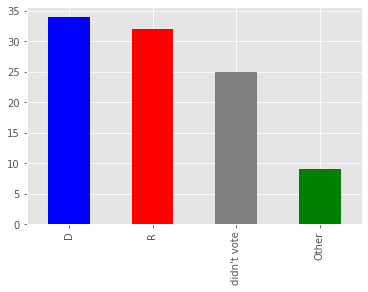

In [47]:
print("Total voters: "+str(df2.gen_elect_2020_party.value_counts().sum()))
print("Total who voted:"+str(df2[df2.gen_elect_2020_party!="didn't vote"].gen_elect_2020_party.value_counts().sum()))
print("Percent party breakdown")
((df2.gen_elect_2020_party.value_counts()/df2.gen_elect_2020_party.value_counts().sum()).round(2)*100).plot(kind='bar',color=['blue','red','grey','green'])

Total voters: 8621492
Total who voted:2725850


<AxesSubplot:>

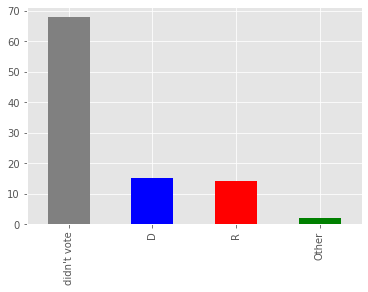

In [49]:
print("Total voters: "+str(df2.muni_elect_2021_party.value_counts().sum()))
print("Total who voted:"+str(df2[df2.muni_elect_2021_party!="didn't vote"].muni_elect_2021_party.value_counts().sum()))
((df2.muni_elect_2021_party.value_counts()/df2.muni_elect_2021_party.value_counts().sum()).round(2)*100).plot(kind='bar',color=['grey','blue','red','green'])

Total voters: 8621492
Total who voted:5389299


<AxesSubplot:>

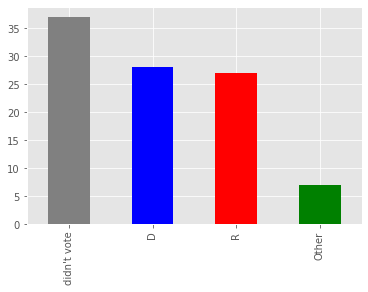

In [51]:
print("Total voters: "+str(df2.gen_elect_2022_party.value_counts().sum()))
print("Total who voted:"+str(df2[df2.gen_elect_2022_party!="didn't vote"].gen_elect_2022_party.value_counts().sum()))
((df2.gen_elect_2022_party.value_counts()/df2.gen_elect_2022_party.value_counts().sum()).round(2)*100).plot(kind='bar',color=['grey','blue','red','green'])

In [52]:
df2['registration_date']=pd.to_datetime(df2.registration_date,errors='coerce')
df2['dob']=pd.to_datetime(df2.dob,errors='coerce')

<AxesSubplot:>

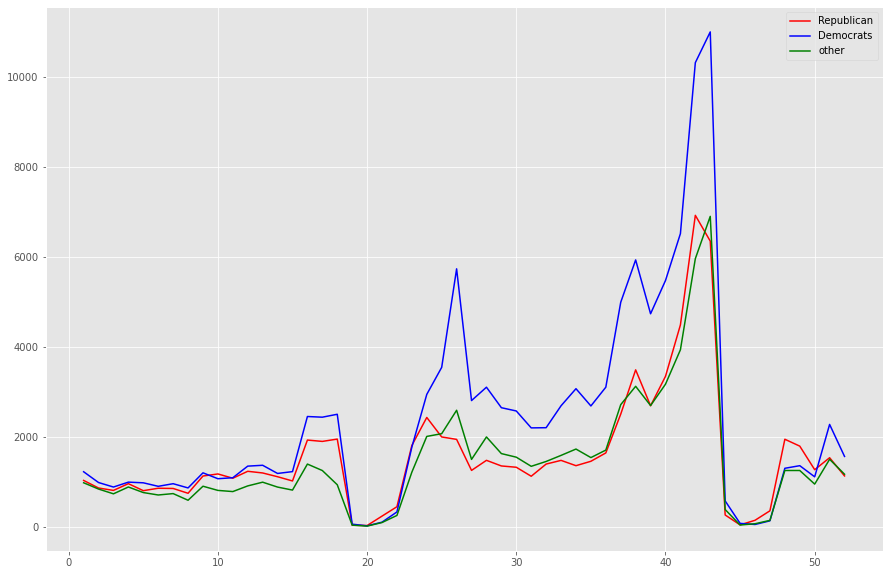

In [59]:
df2[(df2.party_code=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party_code=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party_code=='Other')&(df2.registration_date.dt.year==2022)].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

<AxesSubplot:>

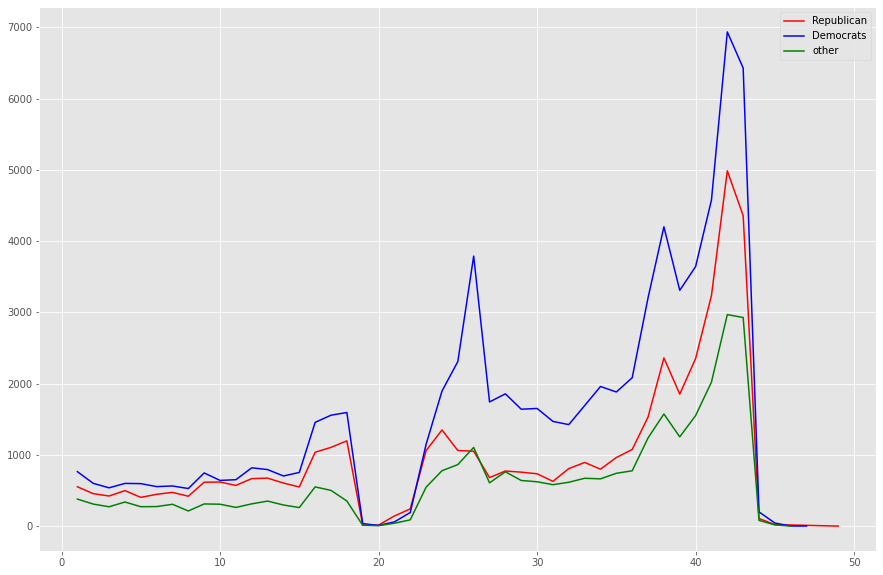

In [61]:
df2[(df2.party_code=='R')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party_code=='D')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party_code=='Other')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

<AxesSubplot:>

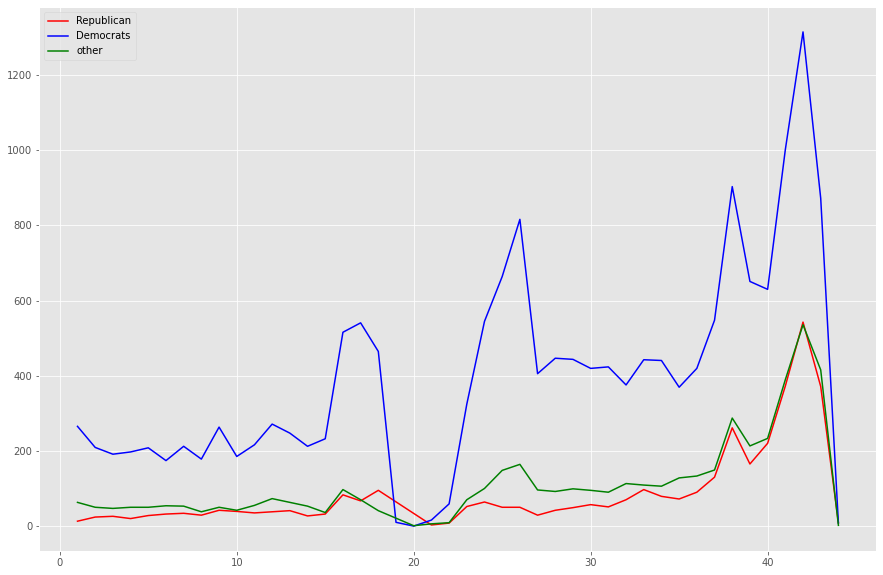

In [60]:
df2[(df2.party_code=='R')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=="MB")].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party_code=='D')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=="MB")].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party_code=='Other')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=="MB")].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

<AxesSubplot:>

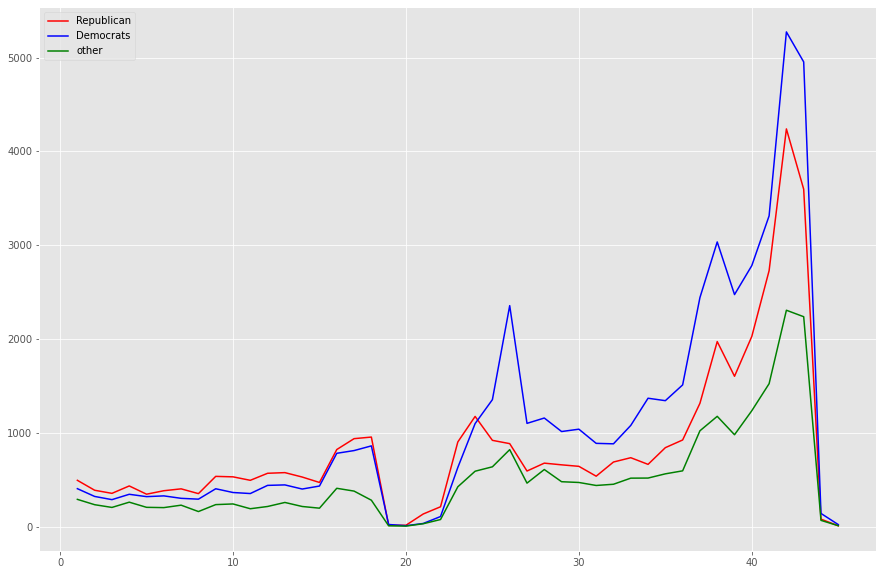

In [62]:
df2[(df2.party_code=='R')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=="AP")].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party_code=='D')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=="AP")].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party_code=='Other')&(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=="AP")].registration_date.dt.isocalendar().week.value_counts().sort_index().plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

In [67]:
df2[df2.registration_date.dt.year==2022].party_code.value_counts()

D        122476
R         81469
Other     75239
Name: party_code, dtype: int64

In [69]:
df2[(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].party_code.value_counts()

D        73867
R        45187
Other    29648
Name: party_code, dtype: int64

In [70]:
df2[(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].party_code.value_counts()/df2[df2.registration_date.dt.year==2022].party_code.value_counts()

D        0.603114
R        0.554653
Other    0.394051
Name: party_code, dtype: float64

In [73]:
df2[(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=='AP')].party_code.value_counts()/df2[(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].party_code.value_counts()

D        0.667280
R        0.848209
Other    0.763357
Name: party_code, dtype: float64

In [74]:
df2[(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method=='MB')].party_code.value_counts()/df2[(df2.registration_date.dt.year==2022)&(df2.gen_elect_2022_vote_method.notna())].party_code.value_counts()

D        0.234949
Other    0.162237
R        0.081439
Name: party_code, dtype: float64

In [82]:
(df2[(df2.gen_elect_2022_vote_method=='MB')].party_code.value_counts()/df2[(df2.gen_elect_2022_vote_method.notna())].party_code.value_counts()).to_clipboard()

In [81]:
(df2[(df2.registration_date.dt.year<=2021)&(df2.muni_elect_2021_vote_method=='MB')].party_code.value_counts()/df2[(df2.registration_date.dt.year<=2021)&(df2.muni_elect_2021_vote_method.notna())].party_code.value_counts()).to_clipboard()

In [80]:
(df2[(df2.registration_date.dt.year<=2020)&(df2.gen_elect_2020_vote_method=='MB')].party_code.value_counts()/df2[(df2.registration_date.dt.year<=2020)&(df2.gen_elect_2020_vote_method.notna())].party_code.value_counts()).to_clipboard()

In [75]:
df2[(df2.gen_elect_2022_vote_method=='AP')].party_code.value_counts()/df2[(df2.gen_elect_2022_vote_method.notna())].party_code.value_counts()

D        0.641346
Other    0.778451
R        0.886598
Name: party_code, dtype: float64

In [65]:
df2[(df2.gen_elect_2022_party.notna())&(df2.gen_elect_2022_vote_method=="MB")].party_code.value_counts()/df2[df2.gen_elect_2022_party.notna()].party_code.value_counts()

D        0.308677
R        0.078492
Other    0.173252
Name: party_code, dtype: float64

In [12]:
(df2[df2.gen_elect_2022_party.notna()].party_code==df2[df2.gen_elect_2022_party.notna()].gen_elect_2022_party).value_counts()

True     4805423
False     583876
dtype: int64

In [13]:
2366057/3430282

0.6897558276549858

In [7]:
(df2[(df2.gen_elect_2022_party.notna())&(df2.county_1=='PHILADELPHIA')].party_code.value_counts()/df2[(df2.county_1=='PHILADELPHIA')].party_code.value_counts())

3RD          NaN
A            NaN
AC      0.333333
AD      0.129032
AI      0.300000
          ...   
WFP     0.722222
WH      0.500000
WIG          NaN
WTBC         NaN
WWP          NaN
Name: party_code, Length: 149, dtype: float64

In [8]:
df2[df2.county_1=="PHILADELPHIA"].id_number.count()/df2.id_number.count()

0.119720693355628

In [9]:
party_code1={"R":"R","D":"D"}
df2['party_code']=df2.party_code.map(party_code1).replace(np.nan,'Other')

In [35]:
c1=pd.read_csv("Official_2202023033244PM.CSV")
c1.columns=c1.columns.str.lower().str.replace(" ",'_')
c1['votes']=c1.votes.str.replace(",",'').astype(float)
c1['election_day_votes']=c1.election_day_votes.str.replace(",",'').astype(float)
c1['mail_votes']=c1.mail_votes.str.replace(",",'').astype(float)
c1['provisional_votes']=c1.provisional_votes.str.replace(",",'').astype(float)
c1=c1[['election_name', 'county_name', 'office_name', 'district_name',
       'party_name', 'candidate_name', 'votes', 
       'election_day_votes','mail_votes', 'provisional_votes']]
c1

,election_name,county_name,office_name,district_name,party_name,candidate_name,votes,election_day_votes,mail_votes,provisional_votes
0,2021 Municipal Election,ADAMS,Justice of the Supreme Court,Statewide,Democratic,"MCLAUGHLIN, MARIA",7586.0,3457.0,4105.0,24.0
1,2021 Municipal Election,ADAMS,Justice of the Supreme Court,Statewide,Republican,"BROBSON, KEVIN",14023.0,12146.0,1867.0,10.0
2,2021 Municipal Election,ADAMS,Judge of the Superior Court,Statewide,Democratic,"LANE, TIMIKA",6978.0,3134.0,3819.0,25.0
3,2021 Municipal Election,ADAMS,Judge of the Superior Court,Statewide,Republican,"SULLIVAN , MEGAN",14493.0,12384.0,2100.0,9.0
4,2021 Municipal Election,ALLEGHENY,Justice of the Supreme Court,Statewide,Democratic,"MCLAUGHLIN, MARIA",184873.0,100499.0,82565.0,1809.0
...,...,...,...,...,...,...,...,...,...,...
263,2021 Municipal Election,WYOMING,Judge of the Superior Court,Statewide,Republican,"SULLIVAN , MEGAN",4932.0,4493.0,413.0,26.0
264,2021 Municipal Election,YORK,Justice of the Supreme Court,Statewide,Democratic,"MCLAUGHLIN, MARIA",30448.0,14955.0,15269.0,224.0
265,2021 Municipal Election,YORK,Justice of the Supreme Court,Statewide,Republican,"BROBSON, KEVIN",53714.0,47595.0,5946.0,173.0
266,2021 Municipal Election,YORK,Judge of the Superior Court,Statewide,Democratic,"LANE, TIMIKA",28338.0,13741.0,14377.0,220.0


In [41]:
c1=c1[c1.office_name=='Justice of the Supreme Court']

In [44]:
total_JSC_votes=c1.votes.sum()

In [50]:
total_JSC_mail_votes=c1.mail_votes.sum()

In [51]:
total_JSC_mail_votes/total_JSC_votes

0.2652315654382616

In [52]:
total_JSC_votes

2769282.0

In [53]:
total_JSC_mail_votes

734501.0

In [55]:
df2['registration_date']=pd.to_datetime(df2.registration_date,errors='coerce')

In [58]:
nov8=pd.to_datetime("2022-11-08")

In [60]:
df2[(df2.registration_date<nov8)&(df2.gen_elect_2022_party.notna())]

,id_number,registration_date,voter_status,party_code,gen_elect_2022_vote_method,gen_elect_2022_party,county_1
0,001003958-01,1955-01-01,A,R,MB,R,ADAMS
1,001010053-01,1965-01-01,A,R,AP,R,ADAMS
2,001012944-01,1968-01-01,A,R,AP,R,ADAMS
3,001015834-01,1975-01-01,A,R,AP,R,ADAMS
4,001015901-01,1975-01-01,A,R,MB,R,ADAMS
...,...,...,...,...,...,...,...
311539,112666964-67,2022-11-03,A,D,AP,D,YORK
311541,112668819-67,2022-11-04,A,D,P,D,YORK
311543,112668900-67,2022-11-04,A,D,P,D,YORK
311544,112668901-67,2022-11-04,A,Other,AP,NF,YORK


In [62]:
5389227-5366179

23048